In [193]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [194]:
df = pd.read_csv("water_potability.csv") 
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [195]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Basic Data Analyses

In [196]:
df.shape 

(3276, 10)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [198]:
df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [199]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analyses

In [200]:
df.fillna(df.median(), inplace=True) 
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Skewness of all columns:
 ph                 0.041266
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.027278
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.087289
Turbidity         -0.007817
Potability         0.450784
dtype: float64


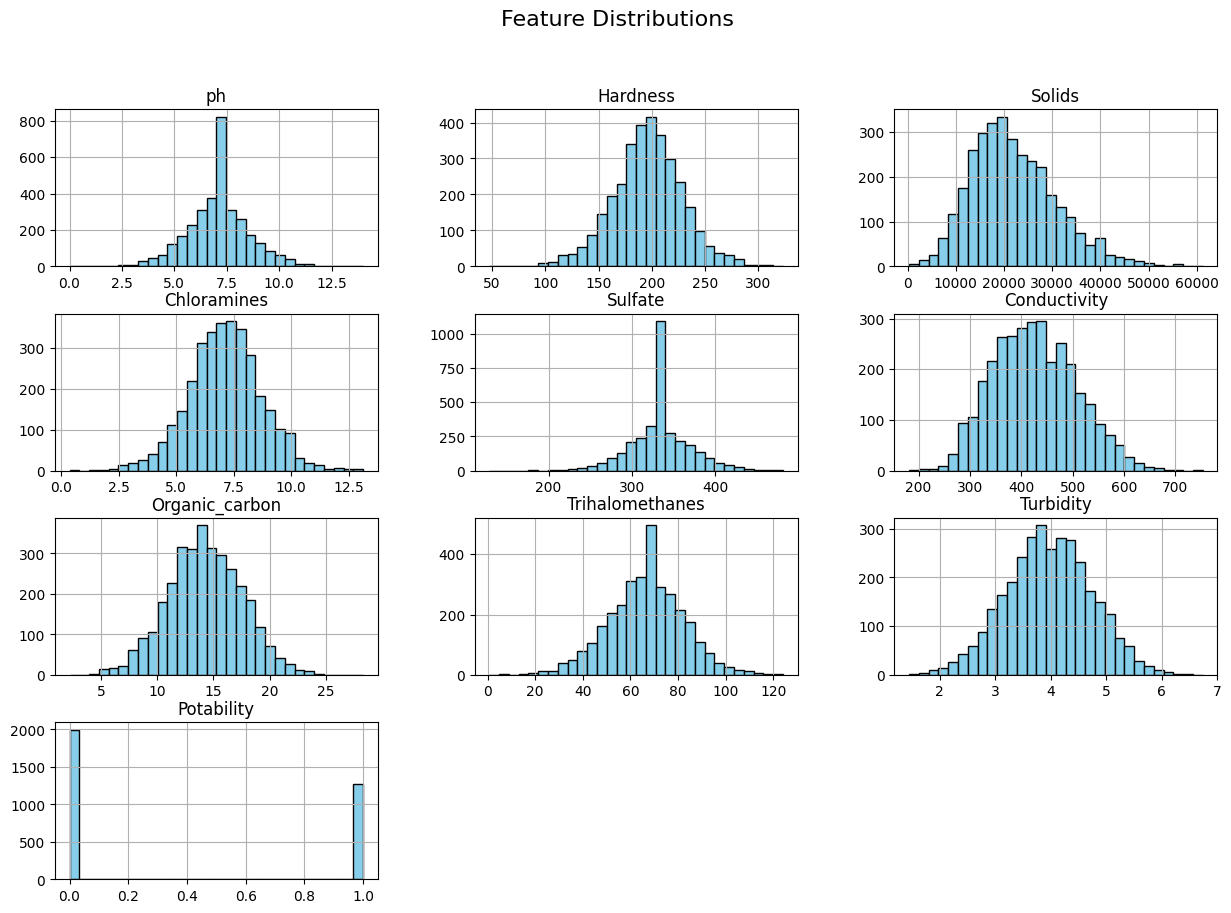

In [201]:
print("Skewness of all columns:\n",df.skew()) 

df.hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black') 
plt.suptitle("Feature Distributions", fontsize=16) 
plt.show()

In [202]:
df["Solids"] = np.sqrt(df["Solids"]) 
df["Solids"].skew()

np.float64(-0.015157793420941885)

In [203]:
outlier_counts = {} 
for col in df.columns[:-1]: 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR 
    upper = Q3 + 1.5 * IQR 
    outliers = df[(df[col] < lower) | (df[col] > upper)] 
    outlier_counts[col] = outliers.shape[0] 
print("Number of outliers per feature:") 
print(outlier_counts)

Number of outliers per feature:
{'ph': 142, 'Hardness': 83, 'Solids': 27, 'Chloramines': 61, 'Sulfate': 264, 'Conductivity': 11, 'Organic_carbon': 25, 'Trihalomethanes': 54, 'Turbidity': 19}


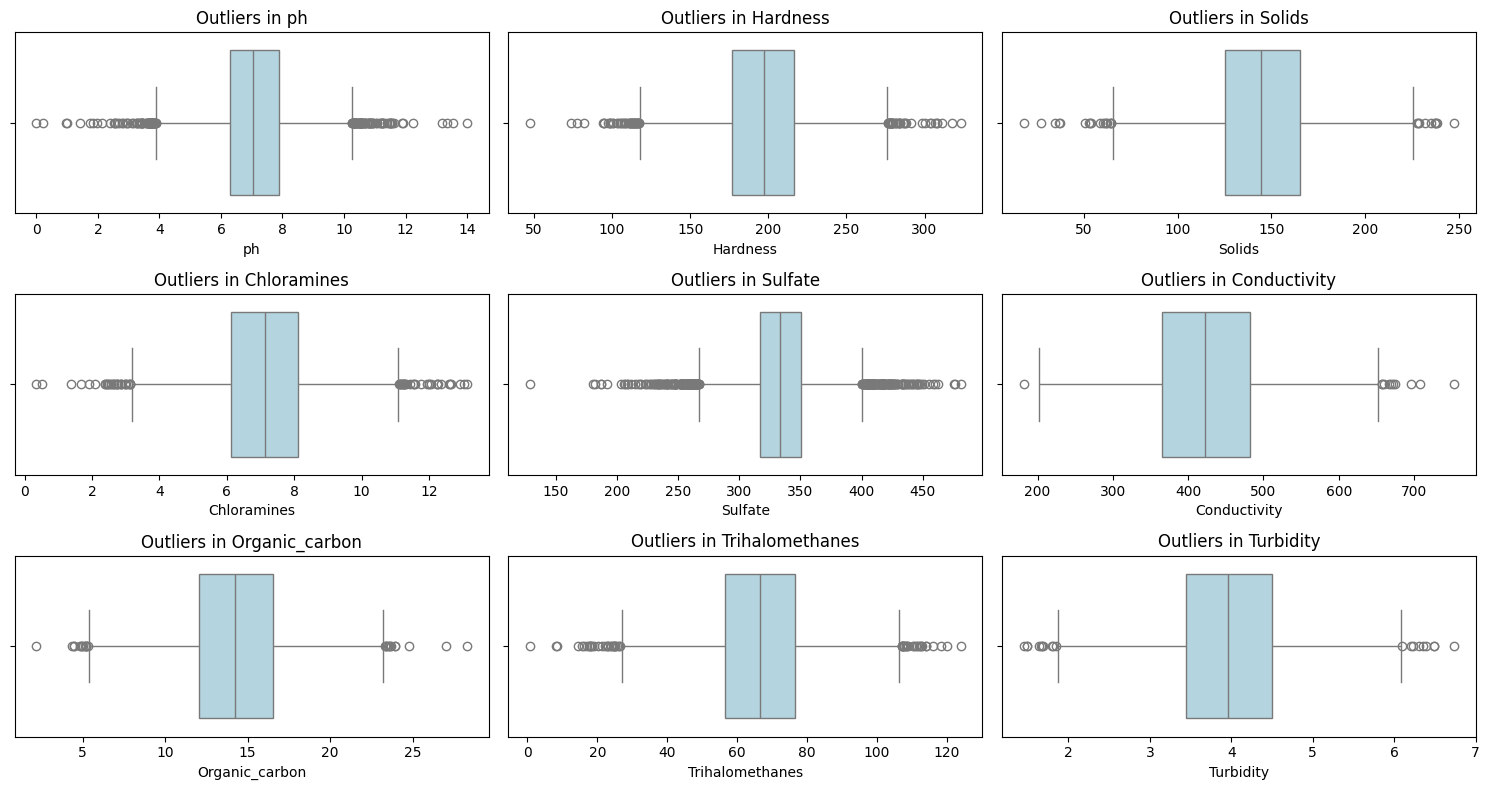

In [204]:
plt.figure(figsize=(15,8)) 

for i, col in enumerate(df.columns[:-1]): 
    plt.subplot(3,3,i+1) 
    sns.boxplot(x=df[col], color='lightblue') 
    plt.title(f"Outliers in {col}") 
plt.tight_layout() 
plt.show()

In [205]:
outlier_counts_after = {} 
for col in df.columns[:-1]: 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR 
    upper = Q3 + 1.5 * IQR 
    df[col] = df[col].clip(lower, upper) 
    outliers = df[(df[col] < lower) | (df[col] > upper)] 
    outlier_counts_after[col] = outliers.shape[0] 
print("Number of outliers per feature after clipping:") 
print(outlier_counts_after)

Number of outliers per feature after clipping:
{'ph': 0, 'Hardness': 0, 'Solids': 0, 'Chloramines': 0, 'Sulfate': 0, 'Conductivity': 0, 'Organic_carbon': 0, 'Trihalomethanes': 0, 'Turbidity': 0}


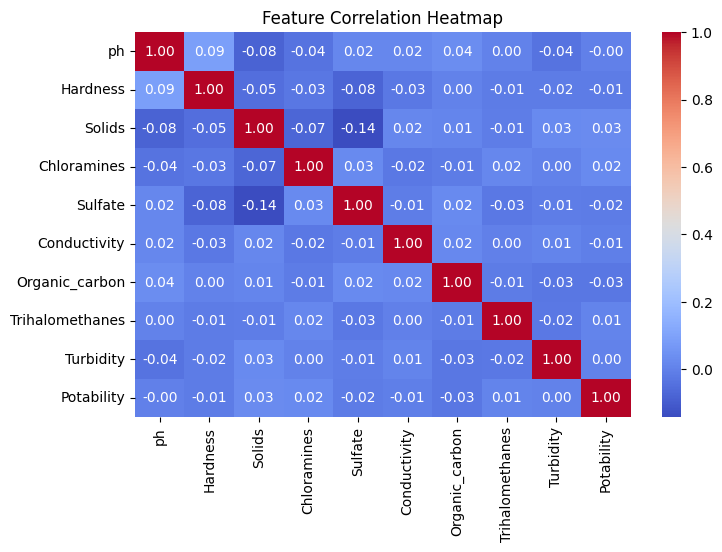

In [206]:
corr = df.corr() 
plt.figure(figsize=(8,5)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Feature Correlation Heatmap") 
plt.show()

Feature Selection

In [207]:
X = df.drop('Potability', axis=1) 
y = df['Potability']

Train-Test Split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Balance classes using RandomOverSampler

In [209]:
ros = RandomOverSampler(random_state=42) 
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Before Resampling:", y_train.value_counts().to_dict())
print("After Resampling:", y_train_res.value_counts().to_dict())

Before Resampling: {0: 1598, 1: 1022}
After Resampling: {0: 1598, 1: 1598}


Train Random Forest Classifier

In [210]:
rf = RandomForestClassifier(n_estimators=800, max_features='sqrt', min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=42) 
rf.fit(X_train_res, y_train_res)

,n_estimators,800
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict Probabilities

In [211]:
y_prob = rf.predict_proba(X_test)[:,1]

Apply Threshold for Potable Detection

In [212]:
threshold = 0.42
y_pred = (y_prob >= threshold).astype(int)

Evaluate Model

In [213]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6051829268292683

Confusion Matrix:
 [[251 149]
 [110 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       400
           1       0.49      0.57      0.53       256

    accuracy                           0.61       656
   macro avg       0.60      0.60      0.59       656
weighted avg       0.62      0.61      0.61       656



Check Feature Importance

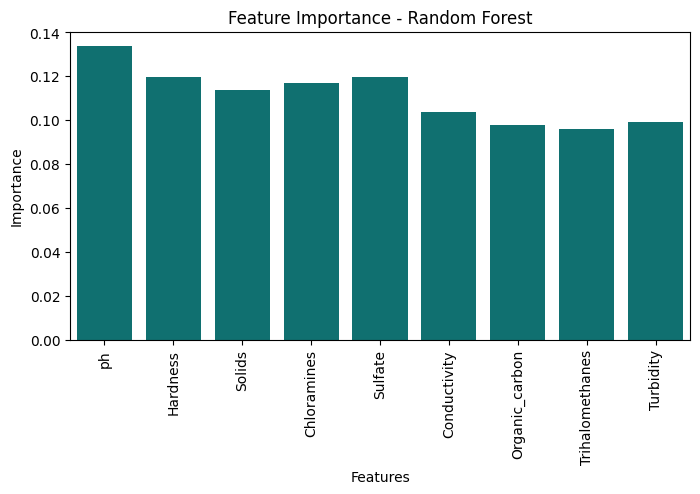

In [214]:
plt.figure(figsize=(8,4)) 
sns.barplot(x=X.columns, y=rf.feature_importances_, color="teal") 
plt.title("Feature Importance - Random Forest") 
plt.xlabel("Features") 
plt.ylabel("Importance") 
plt.xticks(rotation=90) 
plt.show()

Save Model

In [215]:
import pickle
with open("rf_water_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved as rf_water_model.pkl")

Model saved as rf_water_model.pkl
